<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Dataanalysis/blob/main/Zomato_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [5]:
review = pd.read_csv("/content/Zomato Restaurant reviews.csv")

**EDA**

In [3]:
review.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
4282,Karachi Cafe,Ghanvir,"The Chicken Kabiraji was too greasy, I cannot ...",2,1 Review,7/24/2018 21:35,0
7795,Squeeze @ The Lime,JITENDRA SARDIWAL,food was awesome. packing was also too good.,5,"1 Review , 1 Follower",4/24/2018 21:11,0
1264,Absolute Sizzlers,Ramyasudha Konda,Had a bad experience today in Absolute sizzler...,1,"3 Reviews , 1 Follower",3/22/2019 17:17,0
7249,Labonel,Srishti Dubey,Amazing red velvet brownie.Melts in your mouth...,4.5,"34 Reviews , 113 Followers",11/6/2017 15:46,0
5844,Tempteys,Shrishti Prasad,good service and taste is Good,5,"3 Reviews , 1 Follower",8/15/2018 21:31,0


In [7]:
review.shape

(10000, 7)

In [8]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [9]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [10]:
review.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
len(review[review.duplicated()])

36

There are duplicates in our review data set

In [12]:
review[review.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [13]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [14]:
for col in review.columns:
  print(col,":", review[col].nunique())

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


In [15]:
review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)



1.The rating should be an integer, but it contains the value 'like,' indicating that it is of the object data type.

2.Timings are provided in text format, making them an object data type.

3.We have duplicate values, but since they are null values, we can eliminate them.

4.The dataset consists of a total of 10,000 reviews, encompassing 7 features.

5.With the exception of restaurant names and the number of pictures posted, most values are null.

6.Based on the review dataset's description, we can deduce that 100 restaurants have received customer reviews.

7.The rating can be considered a categorical variable ranging from 0 to 5. 8.We can replace missing values with the median rating for that specific restaurant. Since 'like' is not a rating, we can replace it with a rating of 4,as it represents people liking the taste.

8.Customers have posted pictures with 36 distinct values.






**Data Preparation**

In [16]:
review.drop_duplicates(inplace = True, keep = False)

In [17]:
len(review[review.duplicated()])

0

In [18]:
review["Rating"] = review["Rating"].replace('Like', 4)

In [19]:
review["Rating"] = review['Rating'].astype("float")

In [20]:
review["Rating"].dtypes
review["Rating"].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [20]:
review.isna().sum()

Restaurant    0
Reviewer      0
Review        7
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [21]:
review.dropna(subset =['Review'], inplace = True)
review.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [22]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9771,Zega - Sheraton Hyderabad Hotel,Raj,Super expensive wala restaurant that you spend...,3.0,"16 Reviews , 3 Followers",7/2/2018 20:59,0


In [23]:
review["TotalReviews"],review["Followers"] = review["Metadata"].str.split(',').str
review["TotalReviews"] = pd.to_numeric(review["TotalReviews"].str.split(" ").str[0])
review["Followers"] = pd.to_numeric(review["Followers"].str.split(" ").str[1])
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0


In [24]:
review['Followers'].fillna(0,inplace = True)
review["Time"] = pd.to_datetime(review['Time'])
review['Hour'] = pd.DatetimeIndex(review['Time']).hour
review['Year'] = pd.DatetimeIndex(review['Time']).year
#average rating and total number of review given to the restaurants
avg_rating = review.groupby('Restaurant').agg({'Rating' : 'mean', 'Reviewer' : 'count'}).reset_index().rename(columns = {'Reviewer' : 'Total_Review'})
avg_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


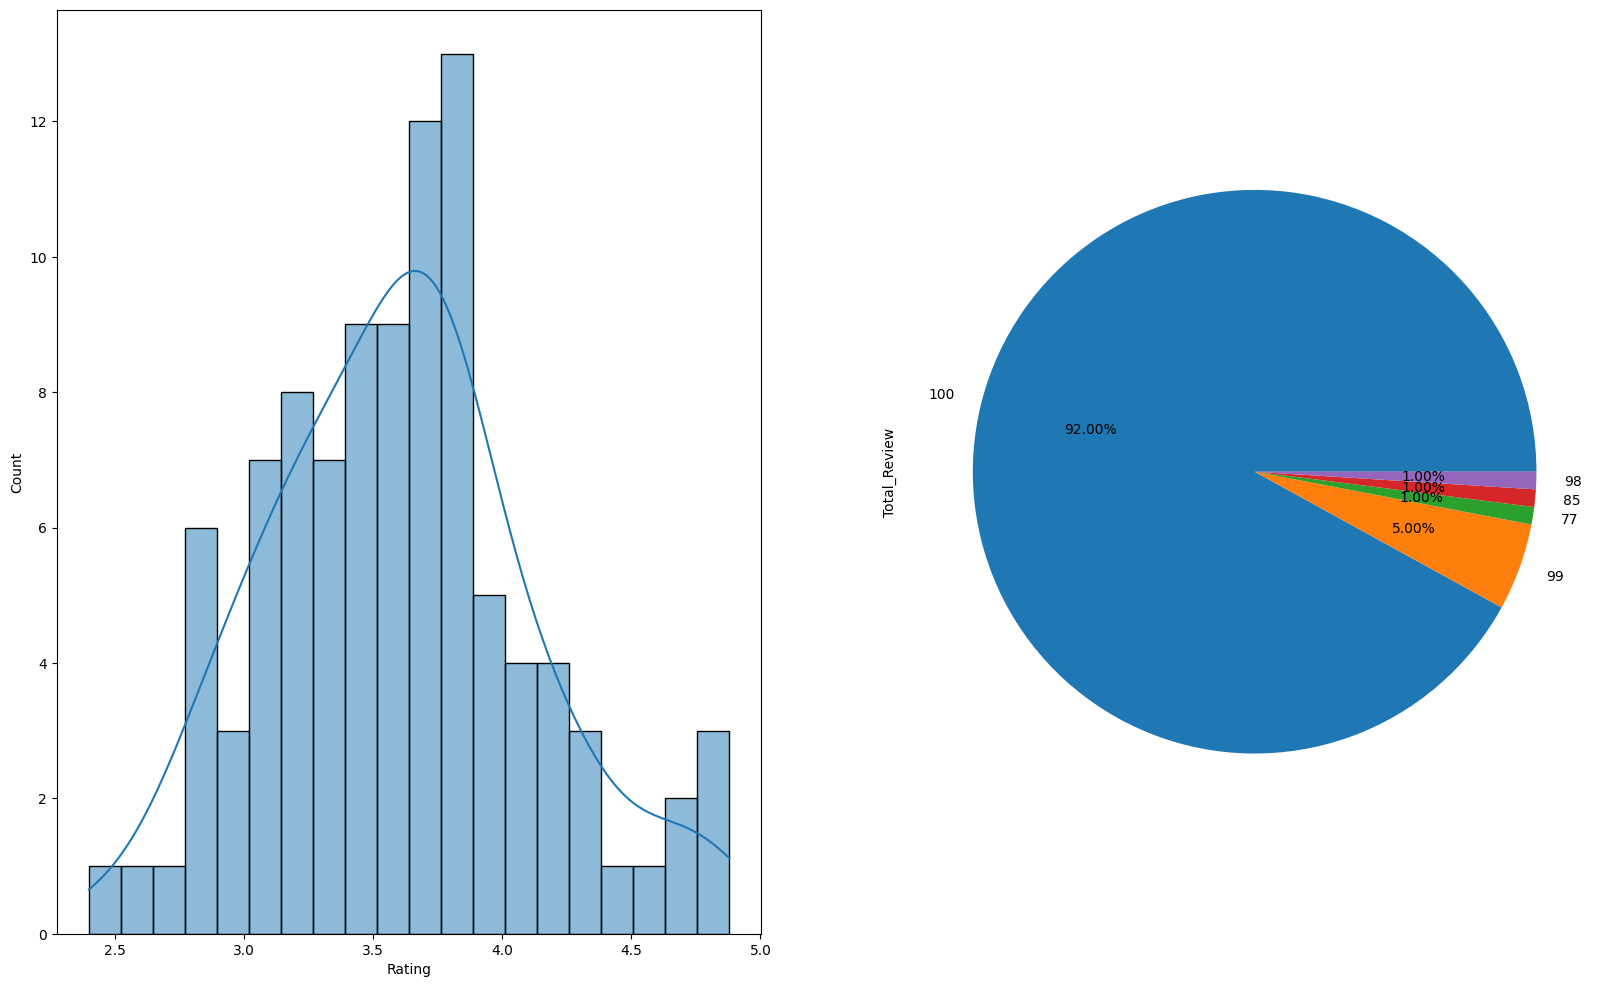

In [27]:
#Histogram of average rating and pie chart of number of reviewers for restaurants
fig,axs = plt.subplots(1,2,figsize=(20,12))
a = sns.histplot(data = avg_rating['Rating'],bins=20,kde=True,ax = axs[0])
b = avg_rating['Total_Review'].value_counts().plot(kind = 'pie',autopct='%1.2f%%',ax=axs[1])
plt.show()

In [30]:
# Numerical cols
num_col = ["Rating",'Followers','TotalReviews','Pictures']

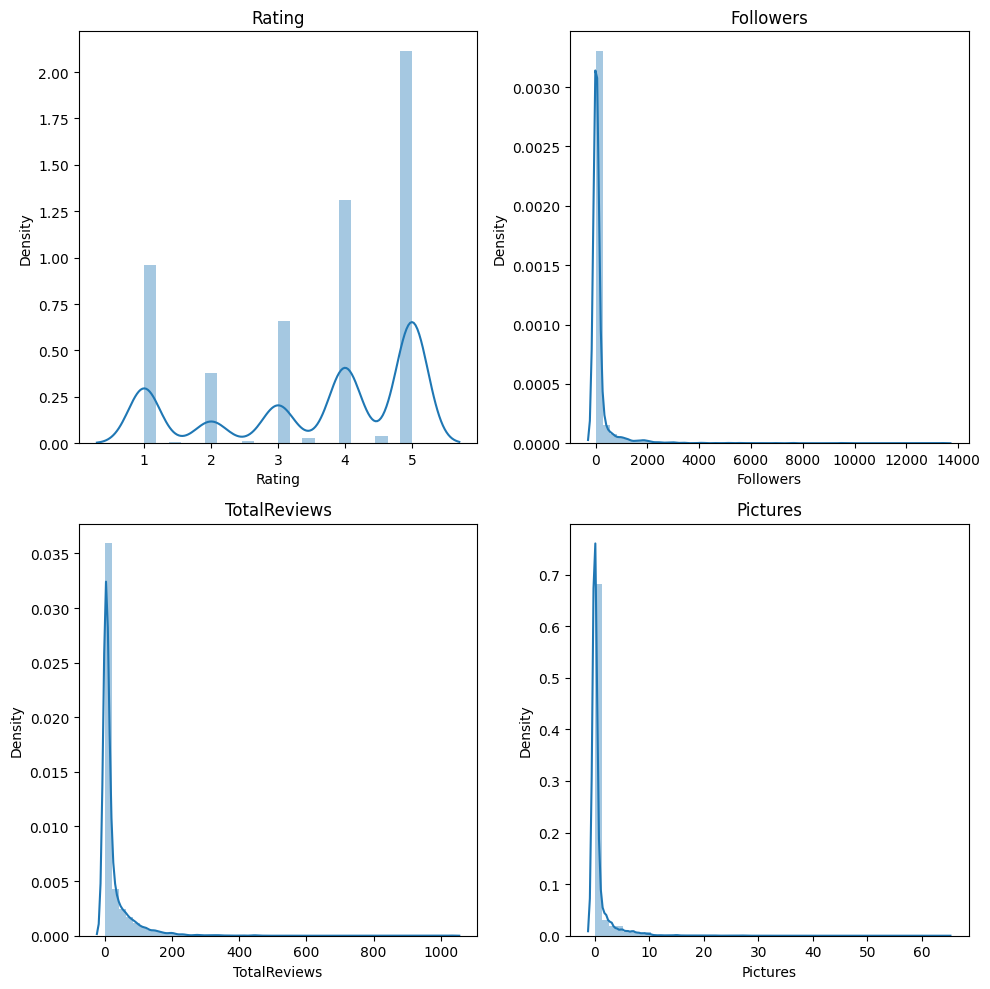

In [33]:
n=1
plt.figure(figsize=(10,10))
for col in num_col:
   plt.subplot(2,2,n)
   n+=1
   sns.distplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

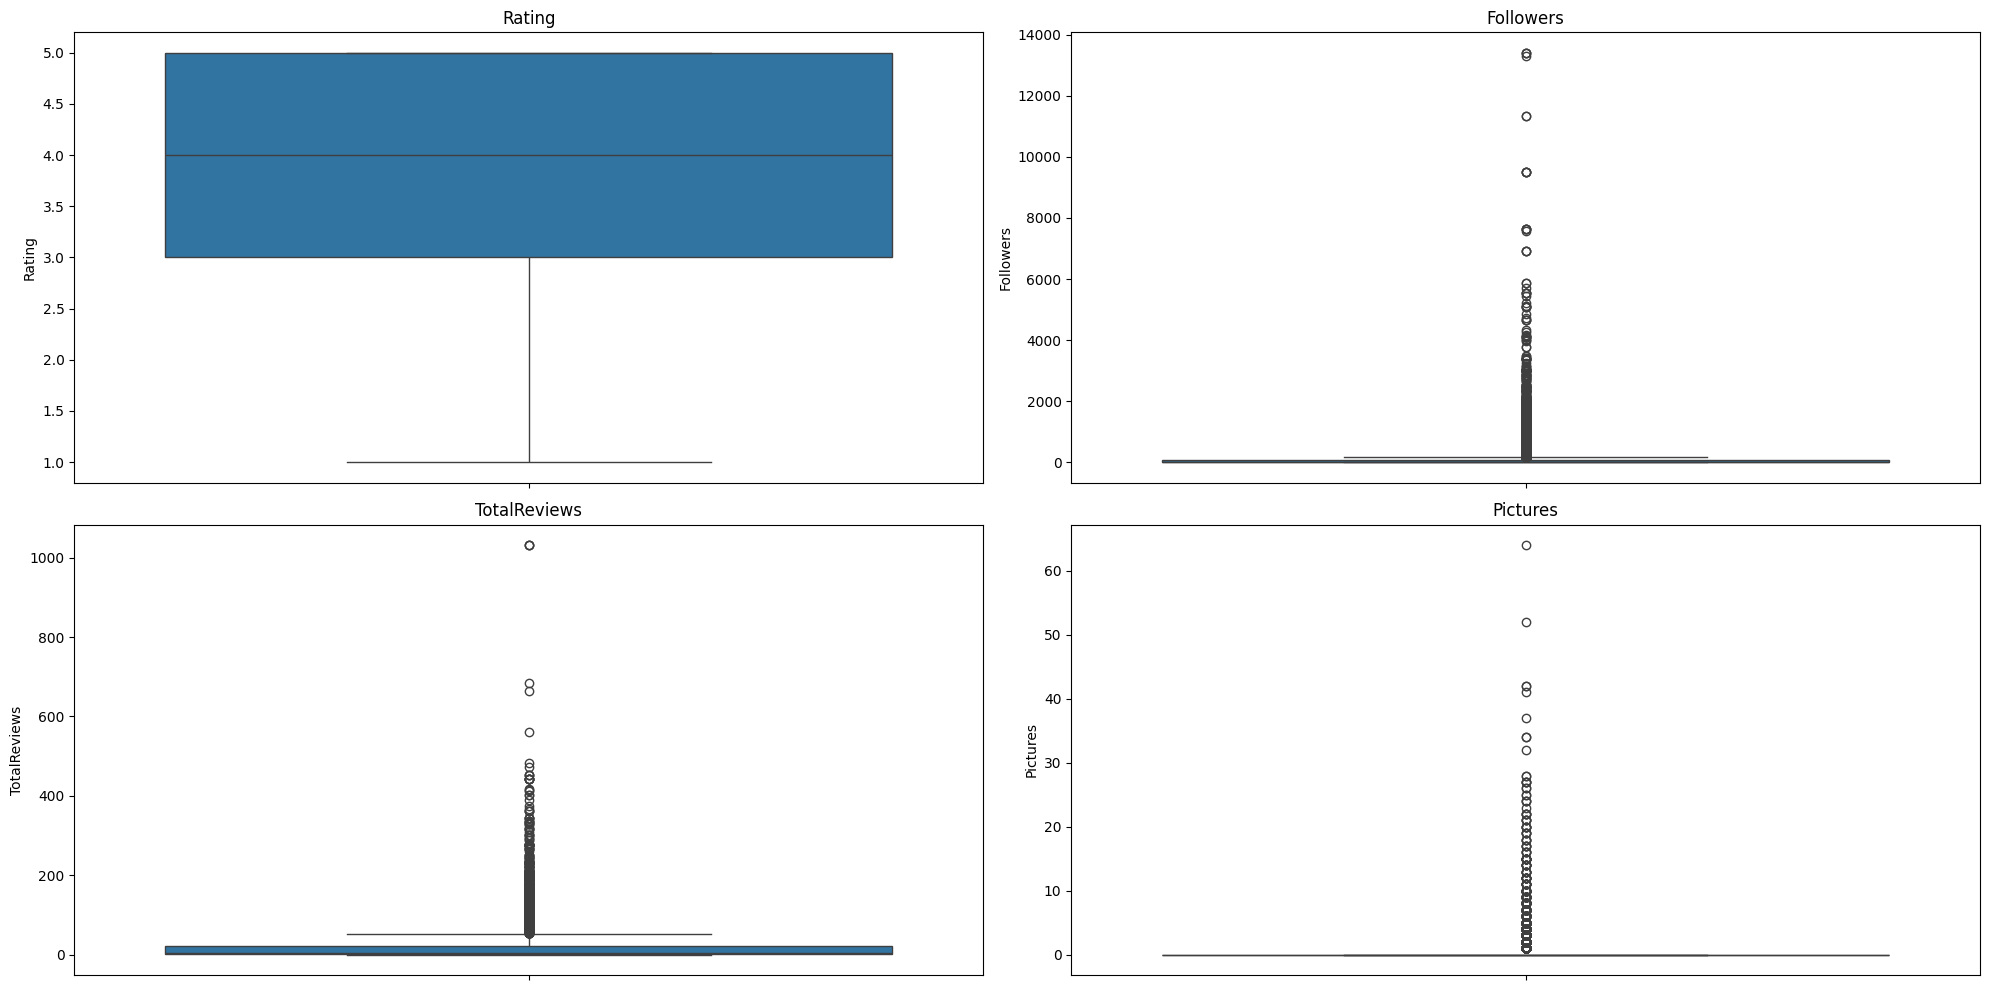

In [34]:
n=1
plt.figure(figsize=(20,10))
for col in num_col:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

In [35]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
6404,Hyderabad Chefs,Manoj Gurrevala,"Here, biriyani taste is nice. Must try ulavach...",3.0,"43 Reviews , 28 Followers",2019-02-01 23:45:00,0,43,28.0,23,2019


In [36]:
#The 'Hour' column contains the hour values, and the 'Count' column contains the corresponding count of occurrences for each hour in the review DataFrame.

hr_count=review.groupby(by='Hour',as_index=False)['Hour'].count().reset_index(drop=False)
hr_count.rename(columns={'index':'Hour','Hour':'Count'},inplace=True)
hr_count

,Hour,Count
0,0,509
1,1,313
2,2,167
3,3,102
4,4,55
5,5,39
6,6,44
7,7,78
8,8,134
9,9,171


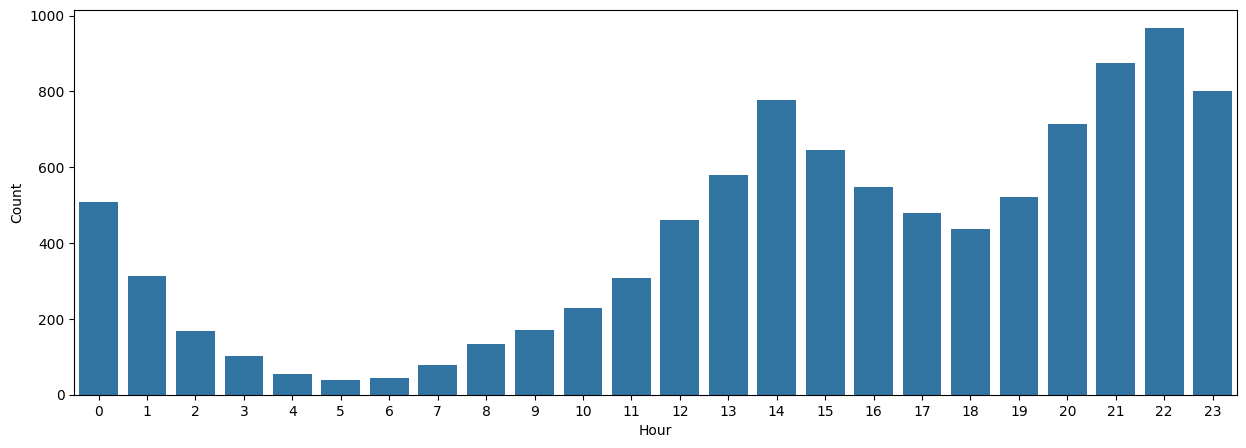

In [37]:
plt.figure(figsize = (15,5))
a = sns.barplot(data = hr_count, x = 'Hour', y = 'Count')
plt.show()

In [38]:
yr_count=review['Year'].value_counts().sort_values(ascending=False).reset_index()
yr_count.rename(columns={'index':'Year','Year':'Count'},inplace=True)
yr_count

,Year,Count
0,2018,4896
1,2019,4803
2,2017,213
3,2016,43


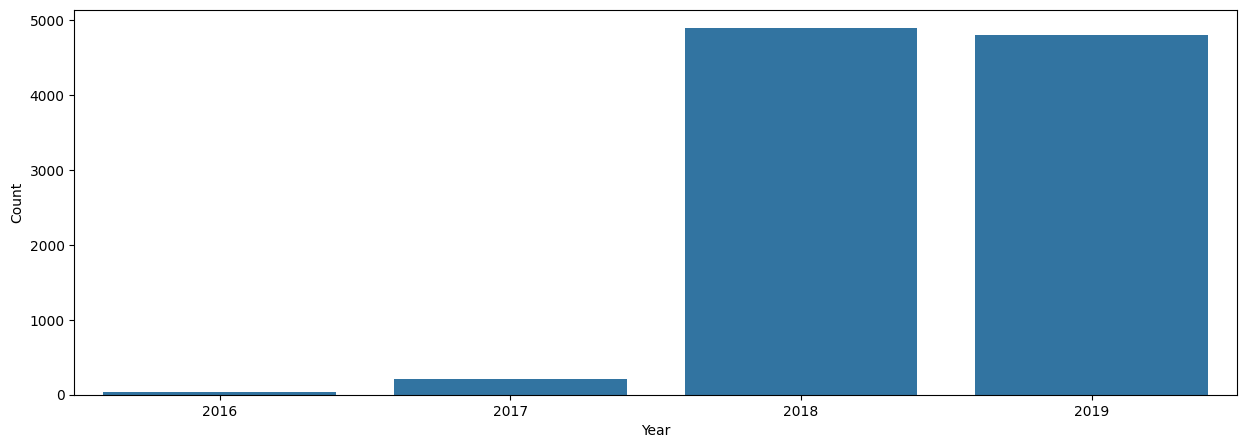

In [39]:
plt.figure(figsize = (15,5))
a = sns.barplot(data = yr_count, x = 'Year', y = 'Count')
plt.show()

In [40]:
#count of review per restaurant

review_rest = review [['Restaurant', 'TotalReviews']].sort_values(by = 'TotalReviews', ascending = False).head(20).reset_index()
review_rest

,index,Restaurant,TotalReviews
0,3124,Pista House,1031
1,7297,Labonel,1031
2,9208,Collage - Hyatt Hyderabad Gachibowli,1031
3,4512,Owm Nom Nom,685
4,7638,The Old Madras Baking Company,665
5,6627,Aromas@11SIX,560
6,9653,Hyderabadi Daawat,482
7,9999,Chinese Pavilion,472
8,9168,Cascade - Radisson Hyderabad Hitec City,452
9,5889,Tempteys,452


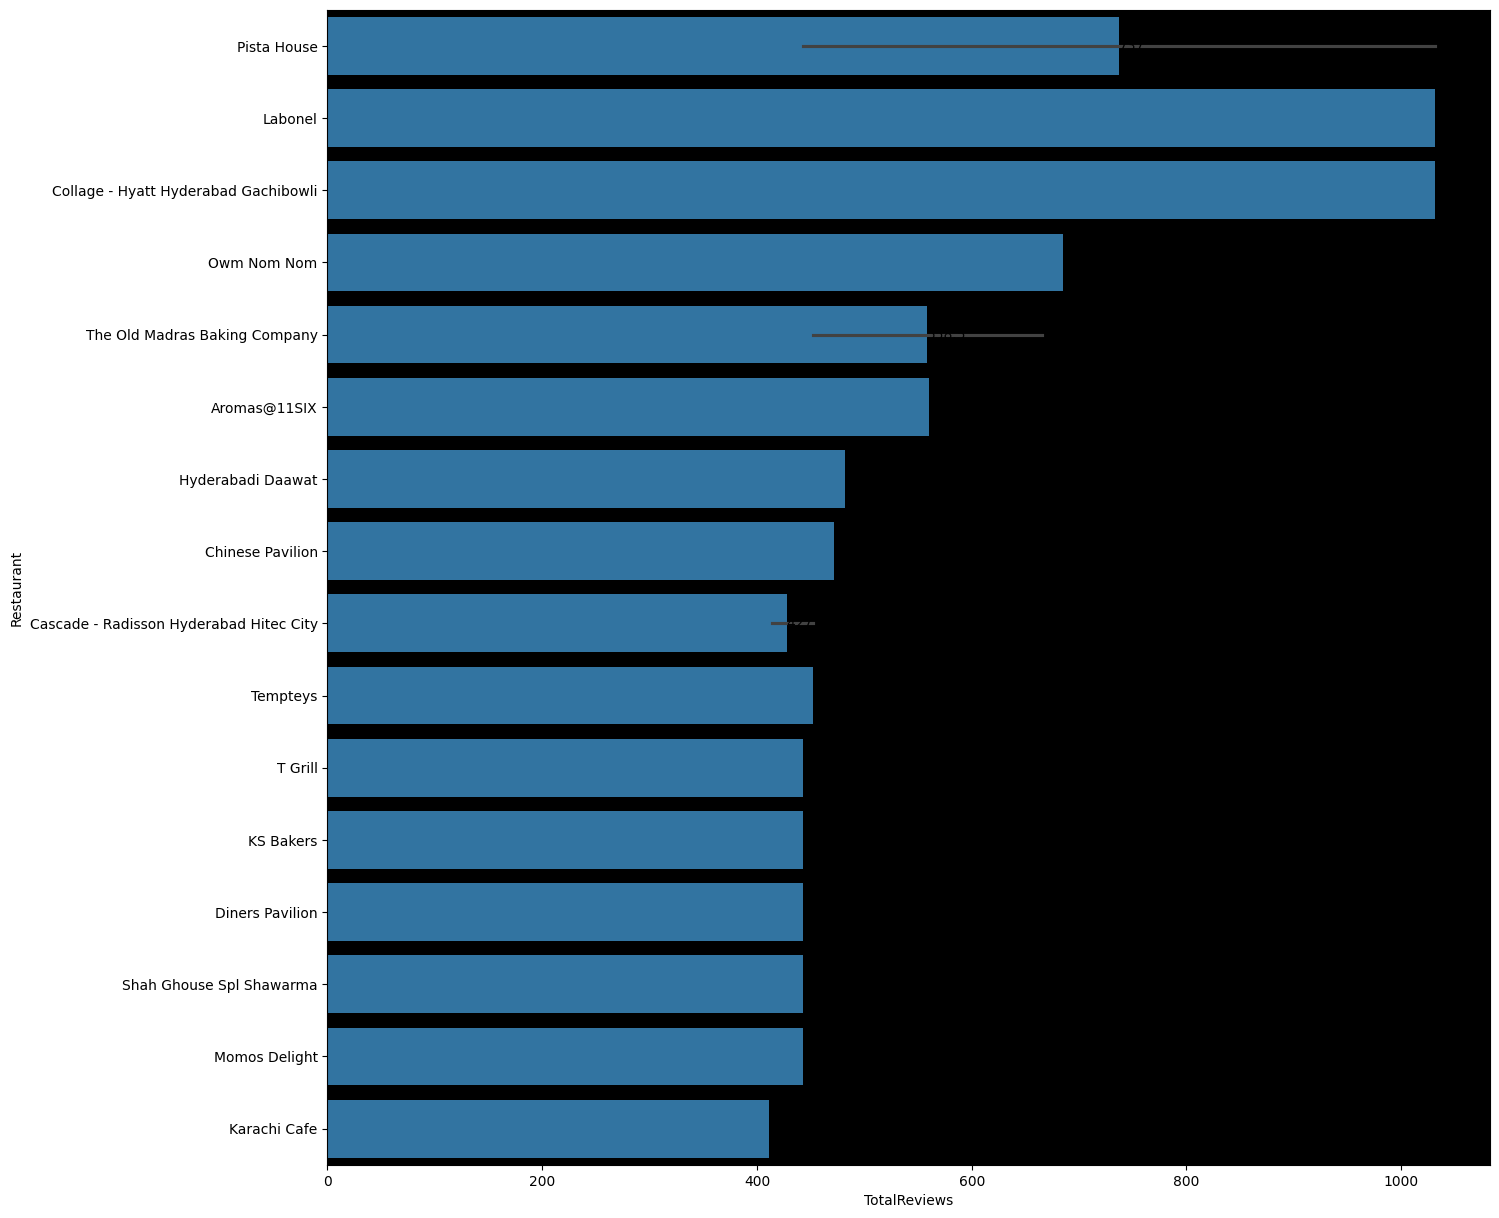

In [41]:
plt.figure(figsize = (15,15))
ab = sns.barplot(x = 'TotalReviews',y = 'Restaurant',data = review_rest )
ab.set_facecolor("black")
ab.bar_label(ab.containers[0])
plt.show()

In [42]:
#The total number of pictures posted for a specific restaurant

pics_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).head(10).reset_index(drop=True))

pics_count

,Restaurant,Pictures
0,PourHouse7,356
1,Arena Eleven,280
2,Marsala Food Company,276
3,Hyderabadi Daawat,234
4,American Wild Wings,218
5,Driven Cafe,212
6,Chinese Pavilion,201
7,Urban Asia - Kitchen & Bar,178
8,Collage - Hyatt Hyderabad Gachibowli,173
9,Jonathan's Kitchen - Holiday Inn Express & Suites,163


In [43]:
#The five restaurants with the lowest number of pictures posted

lowest_pic =  pic_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).reset_index())
bottom_10 = lowest_pic.tail(10)
bottom_10

,index,Restaurant,Pictures
90,9,Aromas@11SIX,5
91,41,Hotel Zara Hi-Fi,5
92,24,Delhi-39,4
93,59,Mohammedia Shawarma,4
94,29,Domino's Pizza,4
95,15,Being Hungry,3
96,43,Hyderabad Chefs,2
97,67,Paradise,2
98,78,Shree Santosh Dhaba Family Restaurant,2
99,40,Hitech Bawarchi Food Zone,1


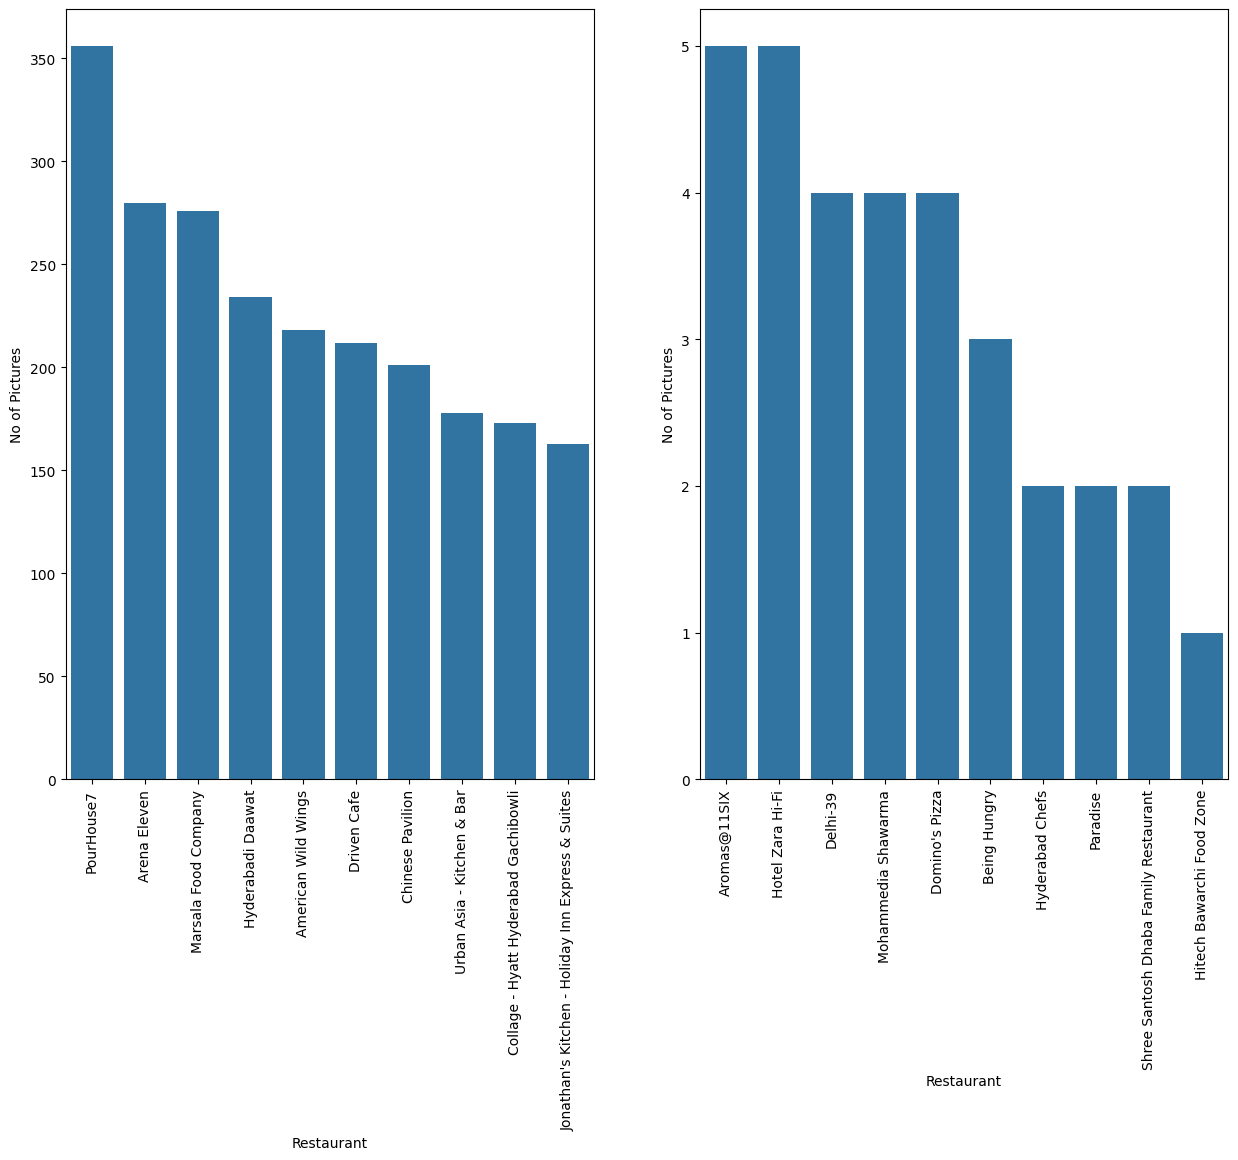

In [44]:
fig, axs = plt.subplots(1,2,figsize =(15,10))
a = sns.barplot(data =pics_count, x = 'Restaurant', y = 'Pictures', ax = axs[0] )
a.set_xticklabels(labels = pics_count["Restaurant"],rotation = 90)
a.set_ylabel("No of Pictures")
b = sns.barplot(data =bottom_10, x = 'Restaurant', y = 'Pictures', ax = axs[1] )
b.set_xticklabels(labels = bottom_10['Restaurant'], rotation = 90)
b.set_ylabel("No of Pictures")
plt.show()

In [45]:
#TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT

follower_count = pd.DataFrame(review[['Restaurant', 'Followers']].groupby(by = 'Restaurant', as_index = False)['Followers'].sum().sort_values(by = 'Followers', ascending = False).reset_index(drop = True))
follower_count

,Restaurant,Followers
0,Pista House,51068.0
1,Komatose - Holiday Inn Express & Suites,46229.0
2,Hyderabadi Daawat,45375.0
3,The Tilt Bar Republic,42126.0
4,Dunkin' Donuts,37667.0
...,...,...
95,Delhi-39,1222.0
96,AB's - Absolute Barbecues,1060.0
97,Paradise,798.0
98,Mohammedia Shawarma,791.0


In [46]:
# top 10 followers

top10Follower = follower_count.head(10)
top10Follower

,Restaurant,Followers
0,Pista House,51068.0
1,Komatose - Holiday Inn Express & Suites,46229.0
2,Hyderabadi Daawat,45375.0
3,The Tilt Bar Republic,42126.0
4,Dunkin' Donuts,37667.0
5,Chinese Pavilion,35426.0
6,Faasos,34640.0
7,T Grill,32222.0
8,Cascade - Radisson Hyderabad Hitec City,31644.0
9,Barbeque Nation,30866.0


In [48]:
#bottom 10 followers

bottom10Follower = follower_count.tail(10)
bottom10Follower

,Restaurant,Followers
90,Flechazo,2748.0
91,Kritunga Restaurant,2223.0
92,Hotel Zara Hi-Fi,1818.0
93,"3B's - Buddies, Bar & Barbecue",1676.0
94,Royal Spicy Restaurant,1497.0
95,Delhi-39,1222.0
96,AB's - Absolute Barbecues,1060.0
97,Paradise,798.0
98,Mohammedia Shawarma,791.0
99,Shree Santosh Dhaba Family Restaurant,562.0


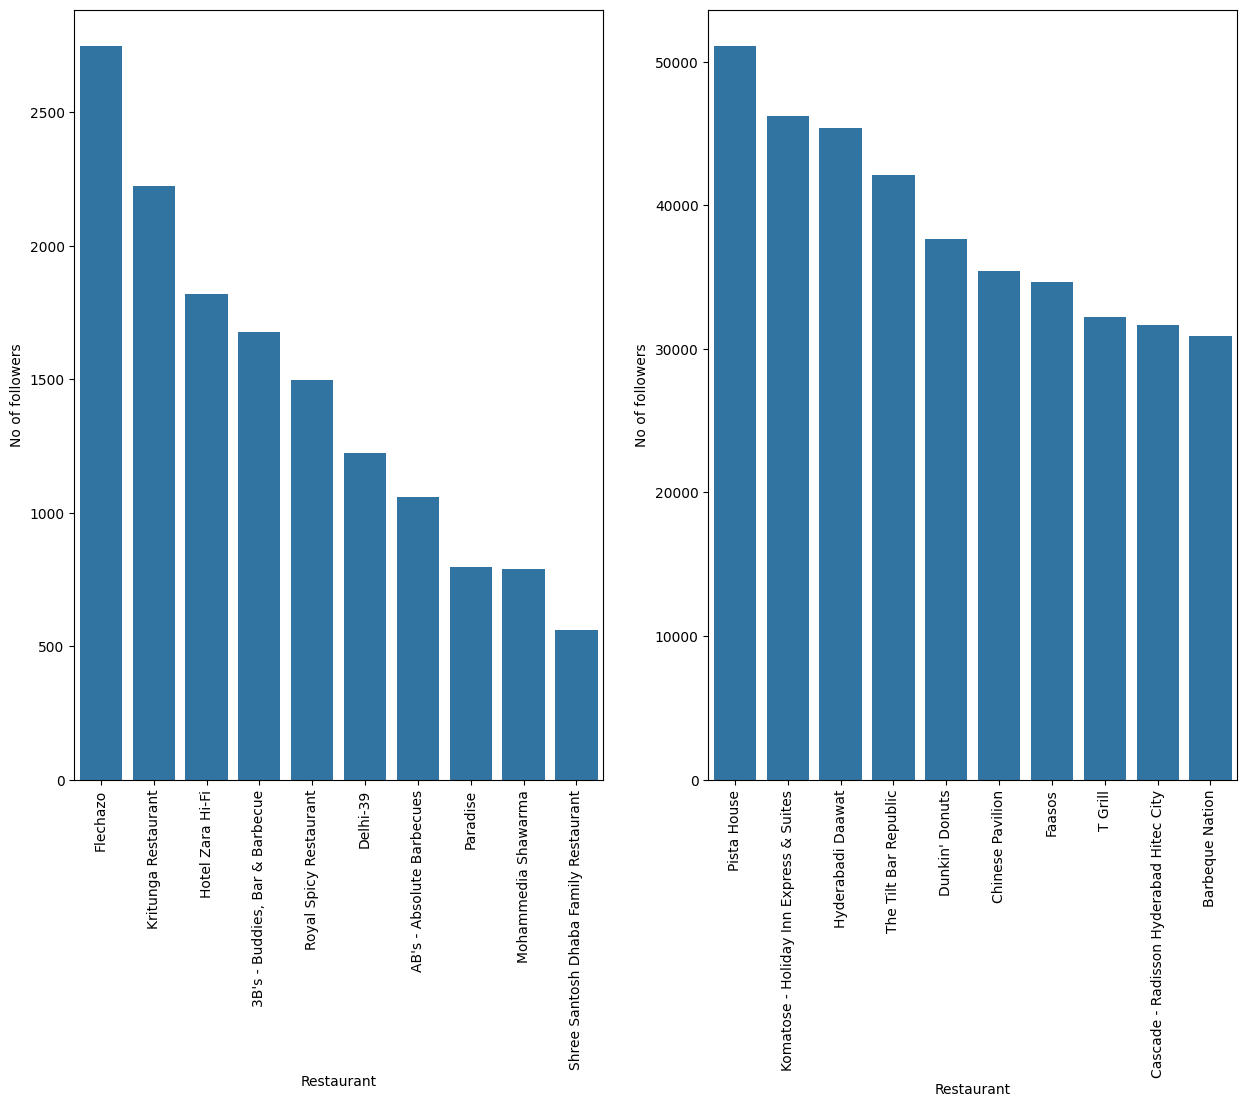

In [49]:
#visualization of least and most follower of reviewer of the restaurants.
fig, axs = plt.subplots(1,2,figsize = (15,10))
a = sns.barplot(data = bottom10Follower, x = 'Restaurant', y = 'Followers', ax = axs[0])
a.set_xticklabels(labels = bottom10Follower['Restaurant'], rotation = 90)
a.set_ylabel("No of followers")
b= sns.barplot(data = top10Follower, x = 'Restaurant', y = 'Followers', ax = axs[1])
b.set_xticklabels(labels = top10Follower['Restaurant'], rotation = 90)
b.set_ylabel("No of followers")
plt.show()

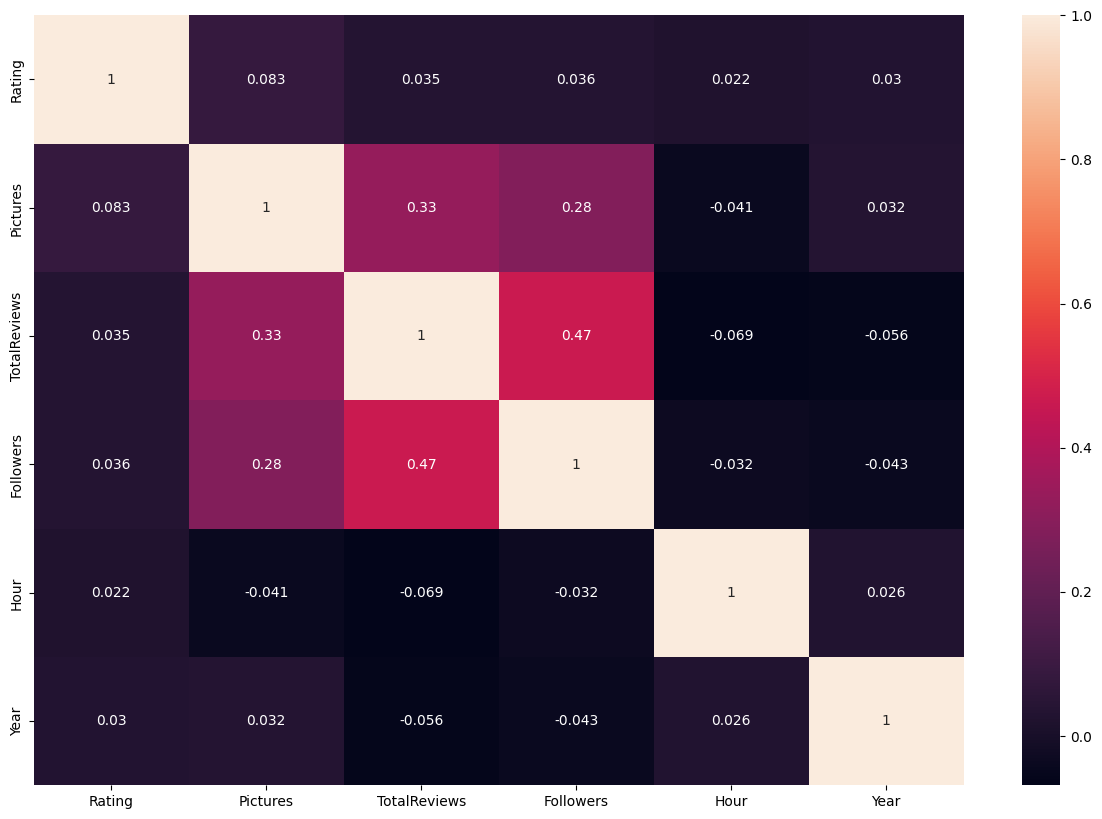

In [50]:
#to see correlation between numerical values

plt.figure(figsize = (15,10))
sns.heatmap(data = review.corr(), annot = True)
plt.show()

**Hypothesis Testing**

Hypothesis 1 : Average rating by the customer is 3.5

Hypothesis 2 : Restaurants which serves greater variety of cuisines are costly.

Hypothesis 3 : Cost is distributed normally.

In [51]:
from scipy import stats
from scipy.stats import ttest_1samp

In [52]:
pop_mean = 3.5
sample = avg_rating['Rating']
t_test, p_value = ttest_1samp(sample, pop_mean)
print(t_test)
print(p_value)

2.006073337322491
0.04757654819636213


In [53]:
# setting level of significance
los = 0.05

In [54]:
if p_value<= los:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


In [55]:
review.sample()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,TotalReviews,Followers,Hour,Year
5005,Gal Punjab Di,Sneha Battula,Definitely worth a try if you're looking for s...,4.0,"76 Reviews , 860 Followers",2019-05-14 12:18:00,0,76,860.0,12,2019


In [56]:
review_df = review.copy()

In [57]:
def null_value(df):
    null_df = pd.DataFrame()
    null_count = df.isnull().sum()
    null_per = null_count/df.shape[0]%100
    null_df['null_count'] = null_count
    null_df['null_per'] = null_per
    return null_df

In [58]:
review_null = null_value(review_df)
review_null

,null_count,null_per
Restaurant,0,0.0
Reviewer,0,0.0
Review,0,0.0
Rating,0,0.0
Metadata,0,0.0
Time,0,0.0
Pictures,0,0.0
TotalReviews,0,0.0
Followers,0,0.0
Hour,0,0.0


In [59]:
def replace_outliers(df, columns):
    for col in columns:
        data = df[col]

        # Calculate the interquartile range (IQR)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1

        # Calculate the lower and upper limits
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.
        5 * iqr

        me = np.mean(data)

        # Replace outliers with their upper and lower limits
        df[col] = np.where(df[col] <= lower_limit, me, df[col])
        df[col] = np.where(df[col] >= upper_limit, me, df[col])

    return df

In [60]:
test = review_df.copy()

In [61]:
test.describe()

,Rating,Pictures,TotalReviews,Followers,Hour,Year
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.600301,0.751984,24.006730,163.108086,15.183626,2018.452436
std,1.483504,2.575691,50.629274,620.153289,6.580091,0.562564
min,1.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
25%,3.000000,0.000000,1.000000,1.000000,12.000000,2018.000000
50%,4.000000,0.000000,4.000000,7.000000,16.000000,2018.000000
75%,5.000000,0.000000,22.000000,63.000000,21.000000,2019.000000
max,5.000000,64.000000,1031.000000,13410.000000,23.000000,2019.000000


In [62]:
colms = ['Followers', 'Rating', 'TotalReviews', 'Pictures']

In [63]:
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])
